# Introduction
You should be reading this in <font color = 'orange'>Google Colab</font>. 

In Part IV, we performed local binary pattern extraction from all of our images in our dataset, transformed the list of array results into a DataFrame, and exported it. 

In this Part, we will use the exported CSV for machine learning and train a classification model to predict tea fermentation levels. 

## Machine Learning

![MachineLearningProcess](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/CommonAssets/MachineLearningProcess.png)

We put this section on all of the projects so bear with us if you've seen this before. 

Generally, the machine learning process has five parts:
1. <strong>Split your data into train and test set</strong>
2. <strong>Model creation</strong>
<br>
Import your models from sklearn and instantiate them (assign model object to a variable)
3. <strong>model fitting</strong>
<br>
Fit your training data into the model and train train train
4. <strong>model prediction</strong>
<br>
Make a set of predictions using your test data, and
5. <strong>Model assessment</strong>
<br>
Compare your predictions with ground truth in test data

Highly recommended readings:
1. [Important] https://scipy-lectures.org/packages/scikit-learn/index.html
2. https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
3. https://scikit-learn.org/stable/tutorial/basic/tutorial.html

### Step 1: Import your libraries
We will be using models from sklearn - a popular machine learning library. However, we won't import everything from sklearn and take just what we need. 

We'll need to import plotting libraries to plot our predictions against the ground truth (test data). 

Import the following:
1. pandas
2. matplotlib.pyplot as plt
3. seaborn as sns

In [1]:
# Step 1: Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Read the CSV you exported in Part IV
Read the CSV containing the normalized LBP frequencies from Part IV.

You should anticipate a DataFrame with:
1. 6,000 rows
2. 21 columns
3. last column is named 'label'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Step 2: Read the CSV
DF=pd.read_csv('/content/drive/MyDrive/Project Tea Fermentation/Frequency v0.1.csv')
DF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,label
0,1.0,0.252482,0.217735,0.112816,0.099955,0.225857,0.123421,0.133912,0.122969,0.177459,0.180054,0.113267,0.117780,0.117329,0.178362,0.142261,0.136846,0.237816,0.329986,0.996503,2
1,1.0,0.252482,0.217735,0.112816,0.099955,0.225857,0.123421,0.133912,0.122969,0.177459,0.180054,0.113267,0.117780,0.117329,0.178362,0.142261,0.136846,0.237816,0.329986,0.996503,2
2,1.0,0.312092,0.231581,0.107951,0.115288,0.174088,0.101518,0.106342,0.102824,0.160217,0.160820,0.112172,0.098301,0.102724,0.175696,0.089155,0.106744,0.158006,0.230375,0.823801,2
3,1.0,0.252482,0.217735,0.112816,0.099955,0.225857,0.123421,0.133912,0.122969,0.177459,0.180054,0.113267,0.117780,0.117329,0.178362,0.142261,0.136846,0.237816,0.329986,0.996503,2
4,1.0,0.252482,0.217735,0.112816,0.099955,0.225857,0.123421,0.133912,0.122969,0.177459,0.180054,0.113267,0.117780,0.117329,0.178362,0.142261,0.136846,0.237816,0.329986,0.996503,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1.0,0.394088,0.305403,0.121242,0.125737,0.154999,0.107560,0.115450,0.099471,0.159992,0.132328,0.092580,0.123639,0.096275,0.163088,0.102966,0.111855,0.213622,0.276141,0.879057,0
5996,1.0,0.394088,0.305403,0.121242,0.125737,0.154999,0.107560,0.115450,0.099471,0.159992,0.132328,0.092580,0.123639,0.096275,0.163088,0.102966,0.111855,0.213622,0.276141,0.879057,0
5997,1.0,0.394088,0.305403,0.121242,0.125737,0.154999,0.107560,0.115450,0.099471,0.159992,0.132328,0.092580,0.123639,0.096275,0.163088,0.102966,0.111855,0.213622,0.276141,0.879057,0
5998,1.0,0.324766,0.201412,0.114295,0.100284,0.201201,0.116718,0.136838,0.142631,0.200990,0.168335,0.121879,0.113979,0.111556,0.160750,0.117560,0.121879,0.232592,0.358475,0.990941,0


### Step 3: Prepare your independent and dependent variables
At this point, let's prepare our indepedent and dependent variables. 

1. Declare a variable, and assign your independent variables to it, i.e. drop "label" from the DataFrame
2. Declare a variable, and assign only values from "label"

In [4]:
# Step 3: Prepare your independent and dependent variables
X=DF.drop('label', axis=1)
y=DF['label']

### Step 4: Import machine learning libraries
Time to import other libraries. We hope you've taken a look at the two articles at the start of this notebook because it'll be useful. 

Import the following libraries and methods:
1. Dummyclassifier - sklearn.dummy
2. DecisionTreeClassifier - sklearn.tree
3. RandomForestClassifier - sklearn.ensemble
4. confusion_matrix - sklearn.metrics
5. train_test_split - sklearn.model_selection

In [5]:
# Step 4: Import the ML libraries
from sklearn.dummy import DummyClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

### Step 5: Split your independent and dependent variables into train and test sets
We'll be using a 80/20 split for train and test set respectively, using the train_test_split function. Don't forget to stratify by your dependent variable as one of the parameters.

In [6]:
# Step 5: Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### Step 6: Train your DummyClassifier machine learning model
Once you've split your data, machine learning begins. We'll start off with a DummyClassifier to set a baseline.

This is what you'll need to do:
1. Declare a variable, and store your model in it (don't forget to use brackets)
2. Fit your training data into the instantiated DummyClassifier model
3. Declare a variable that contains predictions from the model you just trained, using the train dataset (X_test)
4. Print the confusion matrix that compares your prediction with the actual values

In [7]:
# Step 6: Train your DummyClassifier and make a prediction
DummyClass = DummyClassifier()
DummyClass.fit(X_train, y_train)
DummyClass_Pred=DummyClass.predict(X_test)
print(confusion_matrix(y_test, DummyClass_Pred))

[[400   0   0]
 [400   0   0]
 [400   0   0]]


### Step 7: Repeat Step 6 with DecisionTreeClassifier
As expected, DummyClassifier is as good as random guessing but it provides a good baseline. 

Next up, do the same with DecisionTreeClassifier and see what happens.

In [8]:
# Step 7: Train a DecisionTreeClassifier model
DTClass = DecisionTreeClassifier()
DTClass.fit(X_train, y_train)
DTClass_Pred=DTClass.predict(X_test)
print(confusion_matrix(y_test, DTClass_Pred))

[[400   0   0]
 [  0 400   0]
 [  0   0 400]]


### Step 8: Repeat Step 6 with RandomForestClassifier
What...? You probably can't believe your eyes. The DecisionTreeClassifier is perfect. 

Why don't you give RandomForestClassifier another go? 

In [9]:
# Step 8: Train a RandomForestClassifier model
RFClass = RandomForestClassifier()
RFClass.fit(X_train, y_train)
RFClass_Pred=RFClass.predict(X_test)
print(confusion_matrix(y_test, RFClass_Pred))

[[400   0   0]
 [  0 400   0]
 [  0   0 400]]


### Step 9: Identify the most important features in the RandomForestClassifier
Interesting - surely there are features that allow our RandomForest model to be so accurate. 

Let's break it down and extract the feature importances, and use it in conjunction with your column names to turn it into a DataFrame. 

![FeatureImportanceExample](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectTeaFermentation/FeatureImportance.png)

### Step 10: Sort your DataFrame to find the top feature importance
Let's see which feature contributes most to the model.

In [10]:
# Step 10: Sort your feature importance DataFrame
FeatImpt=pd.DataFrame({'feature': RFClass.feature_names_in_, 'importance': RFClass.feature_importances_})
FeatImpt.sort_values(by='importance', ascending=False)

,feature,importance
14,14,0.161585
13,13,0.136802
1,1,0.121549
4,4,0.111068
3,3,0.072585
12,12,0.068133
6,6,0.056321
15,15,0.055233
10,10,0.046635
16,16,0.035394


### Step 11: Plot a boxplot to visualize the differences in the identified features
Now that you've identified the features which contributes most to classifying the tea fermentation levels, let's plot a boxplot to visualize the differences between these features in their respective classes.

We want to look at the three boxplot sets in the features that we've identified in Step 10.

You'll seem something like this:

![FeatureBoxplotsHue](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/ProjectTeaFermentation/FeatureBoxplotHue.png)

<strong>Hint: Google "plotting multiple boxplots in seaborn"</strong>

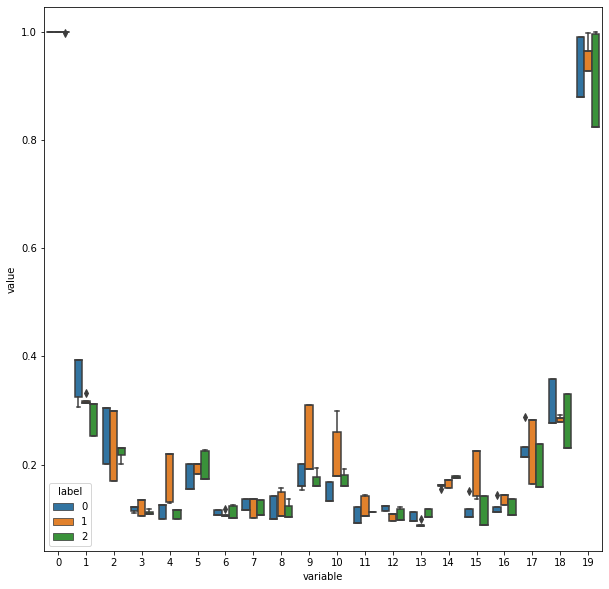

In [79]:
# Step 11: Plot boxplots of features in the three labels
Table=pd.concat([pd.melt(X), pd.concat([y]*20, ignore_index=True)], axis=1)
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x='variable'	, y='value', hue='label', data=Table)
plt.show()

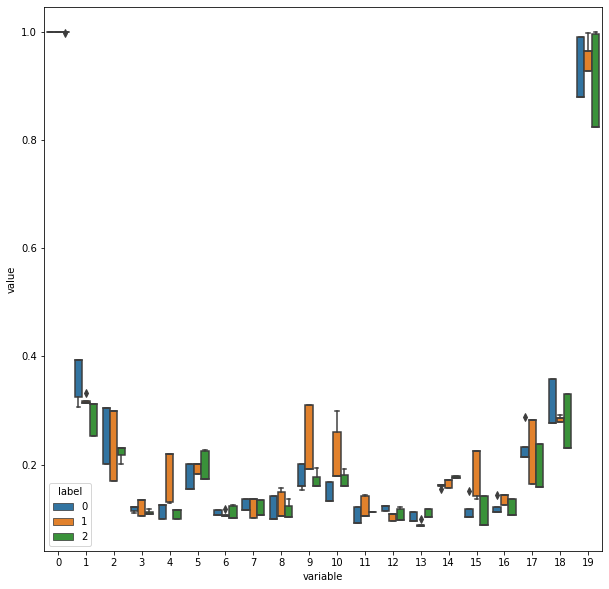

In [78]:
Table=pd.concat([pd.melt(X), pd.concat([y]*20, ignore_index=True)], axis=1)
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(x='variable'	, y='value', hue='label', data=Table)
plt.show()

# The end
And that's the end! We are done with both machine and deep learning aspects of our tea fermentation project.

To recap, you've:
1. Retrieved research data on tea fermentation
2. Split the files in a structure suitable for deep learning
3. Implemented a modified AlexNet neural network architecture
4. Extracted local binary patterns from images 
5. Used local binary patterns as features for machine learning

Go on, give yourself a pat on the back. We hope this project series has give you more confidence in coding and machine learning and deep learning. 

Whatever you learn here is but a tip of the iceberg, and launchpad for bigger and better things to come. Come join us in our Telegram community over at https://bit.ly/UpLevelSG and our Facebook page at https://fb.com/UpLevelSG

Whatever you learn here is but a tip of the iceberg, and launchpad for bigger and better things to come.